In [1]:
import vcsn

# Exercice 1 – Evaluating deterministic automata

## Qu. 1.1

Example with the demo automaton from TP2 (just copy-pasted the code)

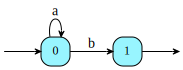

In [5]:
%%automaton a
context = "lal_char(abc), b"
$ -> 0
0 -> 0 a
0 -> 1 b
1 -> $

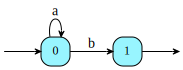

In [6]:
a.determinize()

now the real one

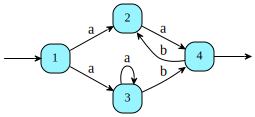

In [14]:
%%automaton a1
context = "lal_char(ab), b"
$ -> 1
1 -> 2 a
1 -> 3 a
2 -> 4 a
3 -> 3 a
3 -> 4 b
4 -> 2 b
4 -> $

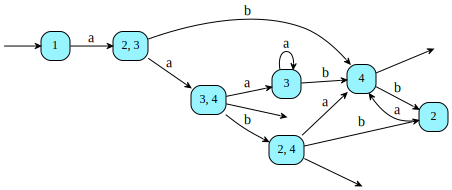

In [15]:
a1_d = a1.determinize()
a1_d

## Qu. 1.2

with the first automaton

In [8]:
a("aaaab")

1

In [9]:
a.evaluate("aaab")

1

In [10]:
a("bbb")

0

with the actual automaton of q1.1

In [16]:
a1("aab")

1

In [17]:
a1.evaluate("aab")

1

In [18]:
a1("ba")

0

## Qu. 1.3

base chaining

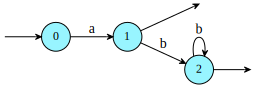

In [12]:
a2 = vcsn.context('lal_char(abc), b').expression('ab*').thompson().proper()
a2

adding *determinization* and *minimization*

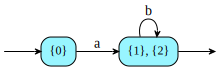

In [19]:
a2 = vcsn.context('lal_char(abc), b').expression('ab*').thompson().proper().determinize().minimize()
a2

More fun: recompute the rational expression from the automaton!

In [20]:
a2.expression()

ab*

In [36]:
def expression_to_minauto(expr):
    return vcsn.context('lal_char(ab), b').expression(expr).thompson().proper().determinize().minimize()

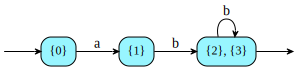

In [37]:
expression_to_minauto("ab{+}")

# Exercice 2 – Intersection of rational languages

## 1. Build an automaton accepting the words on the alphabet {a, b} that have an odd number of b. 


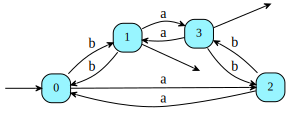

In [24]:
%%automaton aoddb
context = "lal_char(ab), b"
$ -> 0
0 -> 1 b
1 -> 0 b
0 -> 2 a
2 -> 0 a
2 -> 3 b
3 -> 2 b
1 -> 3 a
3 -> 1 a
1 -> $
3 -> $

In [26]:
e = aoddb.expression()
e

(aa+bb+(ab+ba)(aa+bb)*(ab+ba))*(b+(ab+ba)(aa+bb)*(\e+a))

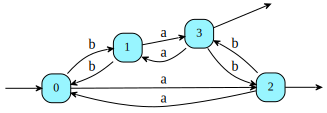

In [28]:
%%automaton aodda
context = "lal_char(ab), b"
$ -> 0
0 -> 1 b
1 -> 0 b
0 -> 2 a
2 -> 0 a
2 -> 3 b
3 -> 2 b
1 -> 3 a
3 -> 1 a
2 -> $
3 -> $

In [30]:
aoddb("aaaaabaaab")

0

In [32]:
aodda("a")

1

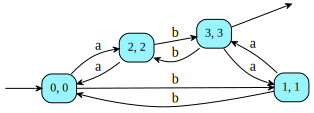

In [33]:
aodda & aoddb

In [34]:
eoddb = vcsn.context('lal_char(ab), b').expression("a*ba*(ba*ba*)*")
eoddb

a*ba*(ba*ba*)*

In [35]:
eoddb.is_equivalent(e)

True

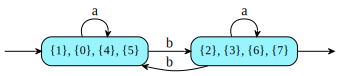

In [39]:
aoddb2 = expression_to_minauto("a*ba*(ba*ba*)*")
aoddb2

In [40]:
eodda = vcsn.context('lal_char(ab), b').expression("b*ab*(ab*ab*)*")
eodda

b*ab*(ab*ab*)*

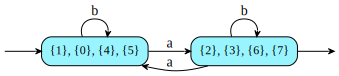

In [41]:
aodda2 = expression_to_minauto("b*ab*(ab*ab*)*")
aodda2

In [42]:
eodda & eoddb

b*ab*(ab*ab*)*&a*ba*(ba*ba*)*

In [43]:
eoddab = vcsn.context('lal_char(ab), b').expression("(b*ab*(ab*ab*)*)&(a*ba*(ba*ba*)*)")
eoddab

b*ab*(ab*ab*)*&a*ba*(ba*ba*)*

In [44]:
aoddab2 = expression_to_minauto("(b*ab*(ab*ab*)*)&(a*ba*(ba*ba*)*)")
aoddab2

RuntimeError: thompson: operator conjunction not supported: b*ab*(ab*ab*)*&a*ba*(ba*ba*)*
  while computing thompson automaton of: b*ab*(ab*ab*)*&a*ba*(ba*ba*)*

Ha, sure, the Thompson algorithm implementation does not support extended expressions.
`automaton()` does, thow, if I remember well…

In [45]:
eoddab.shortest(10)

ab + ba + aaab + aaba + abaa + abbb + baaa + babb + bbab + bbba

# Exercice 3 – Mans Hulden’s problem


In [47]:
ctx = vcsn.context('lal_char(ab), b')

# A helper function to define expressions on ’lal_char(abc), b’.
def exp(e):
# If ’e’ is not a real expression object, convert it.
    return e if isinstance(e, vcsn.expression) else ctx.expression(e)

def t1(re):
    re = exp(re)
    all = exp('[^]*')
    # * denotes the concatenation.
    return all * re * all

In [48]:
t1('a')

(a+b)*a(a+b)*

In [49]:
t1('ab+ba')

(a+b)*(ab+ba)(a+b)*

q2

In [54]:
def t2(re):
    re = exp(re)
    all = exp('[^]*')
    return all * re * all * re * all

In [55]:
t2("ab+ba")

(a+b)*(ab+ba)(a+b)*(ab+ba)(a+b)*

In [56]:
t2("ab+ba").shortest(20)

abab + abba + baab + baba + aabab + aabba + abaab + ababa + ababb + abbaa + abbab + abbba + baaab + baaba + baabb + babaa + babab + babba + bbaab + bbaba

q5

In [57]:
def t3(re):
    re = exp(re)
    all = exp('[^]*')
    any = exp('[^]')
    return (re * any) & (any * all * re)

In [58]:
t3("ab+ba").shortest(20)

aba + bab

q7

In [63]:
def t4_false(re): # overlapping is not necessary here
    re = exp(re)
    all = exp('[^]*')
    any = exp('[^]')
    return (all * re * all) & (any * all * re * all)

In [64]:
def t4(re):
    re = exp(re)
    all = exp('[^]*')
    any = exp('[^]')
    return all * ((re * all) & (any * all * re)) * all

In [65]:
ee = t4("ab+ba")

In [66]:
ee.is_equivalent(t4_j("ab+ba"))

False

In [67]:
t4("ab+ba").shortest(20)

aba + bab + aaba + abaa + abab + abba + baab + baba + babb + bbab + aaaba + aabaa + aabab + aabba + abaaa + abaab + ababa + ababb + abbaa + abbab

q8

In [68]:
def t5(re):
    re = exp(re)
    all = exp('[^]*')
    any = exp('[^]')
    return (all * re * all) % (all * ((re * all) & (any * all * re)) * all)

Q9.  
Warning we check with $L = \{ab, aba\}$ now.

In [78]:
t5("ab+aba").shortest(20)

ab + aab + aba + abb + bab + aaab + aaba + aabb + abaa + abba + abbb + baab + baba + babb + bbab + aaaab + aaaba + aaabb + aabaa + aabba

!!! `aba` 

In [80]:
def composite(re):
    re = exp(re)
    all = exp('[^]*')
    some = exp('[^]{+}')
    return exp(re & (some * re * all + all * re * some))

In [81]:
composite("ab+aba").shortest(20)

aba

In [82]:
def exact1infix(re):
    re = exp(re)
    all = exp('[^]*')
    any = exp('[^]')
    return (all * re * all) % \
        (all * ((re * all) & (any * all * re) + composite(re)) * all)

In [83]:
exact1infix("ab+aba").shortest(20)

ab + aab + abb + bab + aaab + aabb + abba + abbb + baab + babb + bbab + aaaab + aaabb + aabba + aabbb + abbaa + abbba + abbbb + baaab + baabb